<a href="https://colab.research.google.com/github/wilsonarrubla/Ciclo3/blob/master/Clasificacion_Car_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Riesgo de Accidentalidad


1. Preparación de Datos

2. División de los datos

3. Aprendizaje del Modelo

4. Evaluación del Modelo

5. Guardar el modelo


In [ ]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **1. Preparación de los datos**



In [ ]:
#Cargamos los datos

data = pd.read_csv("carRisk.csv", sep = ",")
data.head()

,age,cartype,risk
0,20,combi,high
1,18,sport,high
2,40,sport,high
3,50,family,low
4,35,minivan,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      720 non-null    int64 
 1   cartype  720 non-null    object
 2   risk     720 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.0+ KB


In [ ]:
data.describe()

,age
count,720.000000
mean,33.125000
std,9.974847
min,18.000000
25%,27.500000
50%,33.500000
75%,40.000000
max,50.000000


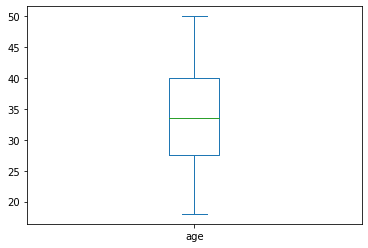

In [ ]:
#Descripción variables numérica

data['age'].plot(kind='box')

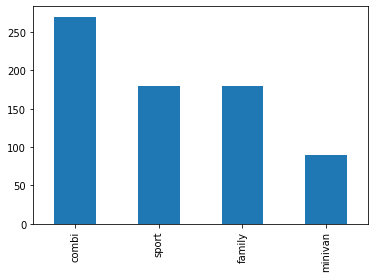

In [ ]:
#Descripción variables categóricas

data['cartype'].value_counts().plot(kind='bar')

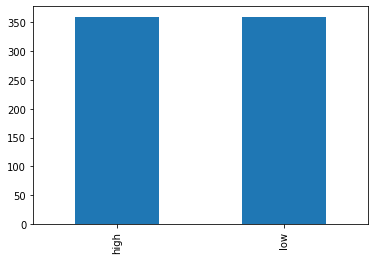

In [ ]:
#Descripción variables categóricas

data['risk'].value_counts().plot(kind='bar')

In [ ]:
#Sklearn sólo analiza variables numéricas

data = pd.get_dummies(data, columns=['cartype'], drop_first=False) #Si son 2 categorias, se borra una dummy(drop_first=true)

data.head()

,age,risk,cartype_combi,cartype_family,cartype_minivan,cartype_sport
0,20,high,1,0,0,0
1,18,high,0,0,0,1
2,40,high,0,0,0,1
3,50,low,0,1,0,0
4,35,low,0,0,1,0


In [ ]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["risk"]=labelencoder.fit_transform(data["risk"])
data.head()

,age,risk,cartype_combi,cartype_family,cartype_minivan,cartype_sport
0,20,0,1,0,0,0
1,18,0,0,0,0,1
2,40,0,0,0,0,1
3,50,1,0,1,0,0
4,35,1,0,0,1,0


## **2. Division 70 % Train- 30 % Test**  

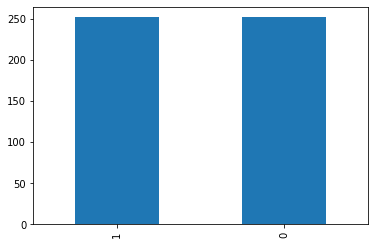

In [ ]:
#División 70-30

from sklearn.model_selection import train_test_split
X = data.drop("risk", axis = 1) # Variables predictoras
Y = data['risk'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado en clasificacion
Y_train.value_counts().plot(kind='bar') # Esta instrucción grafiva la variable objetivo del 70%  y_train=variable objetivo 70


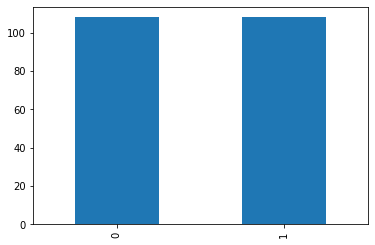

In [ ]:
Y_test.value_counts().plot(kind='bar')# Esta instrucción grafica la variable objetivo del 30%  y_test=variable objetivo 30

# **3.Aprendizaje con el 70 % y Evaluación con el 30%**

# **Tree de Clasificación**

* Variables categóricas en dummies ✅

* Variable objetivo con labelencoder ✅

In [ ]:
#Creación del modelo con el conjunto de entrenamiento

from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=10)
modelTree.fit(X_train, Y_train) #70% train- Esta es la instrucción que hace el entrenamiento

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

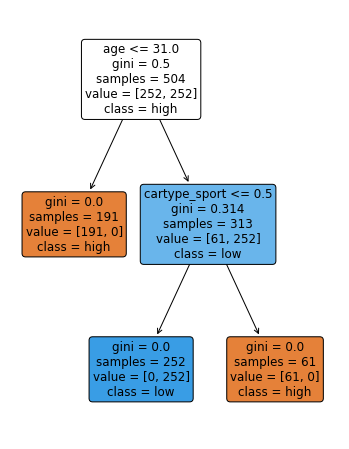

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8)) #
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)#
plt.show() 

**Evaluación con el 30%**


In [ ]:
#Evaluación 30%: Exactitud

from sklearn import metrics
Y_pred = modelTree.predict(X_test) #30% Test
#Comparación Y_test y Y_pred
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred) #Exactitud

print(exactitud)

1.0


# ***Matriz de confusión***


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


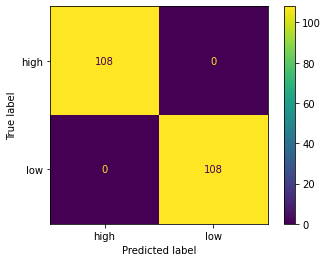

In [ ]:
from sklearn import metrics
metrics.plot_confusion_matrix(estimator=modelTree, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  

plt.show()

# **Reporte completo**


In [ ]:
#Precision, Recall, f1, exactitud

print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       108
         low       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



**Curva ROC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


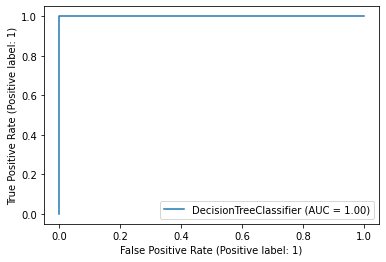

In [ ]:
 # Curva ROC

metrics.plot_roc_curve(estimator=modelTree, X=X_test, y=Y_test)  #30%

plt.show() 



# **KNN para Clasificación**

* Variables numéricas normalizadas

* Variablles categóricas en dummies

* Variable objetivo con labelencoder

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['age']]) #Ajuste de los parametros: max - min


#Se aplica la normalización a 70%  y 30%
X_train[['age']]= min_max_scaler.transform(X_train[['age']]) #70%
X_test[['age']]= min_max_scaler.transform(X_test[['age']])  #30%
X_train.head()

,age,cartype_combi,cartype_family,cartype_minivan,cartype_sport
526,0.4375,0,1,0,0
282,0.6875,0,0,0,1
287,0.6875,1,0,0,0
597,0.3750,1,0,0,0
441,0.0000,0,0,0,1


In [ ]:
#Aprendizaje KNN con 70%

from sklearn.neighbors  import KNeighborsClassifier 
modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
modelKnn.fit(X_train, Y_train) #70%

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


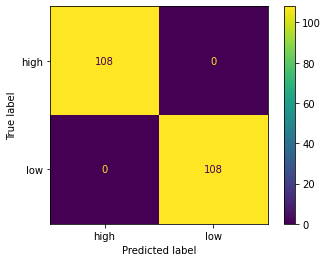

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        high       1.00      1.00      1.00       108
         low       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



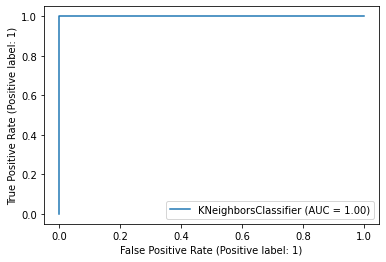

In [ ]:
#Evaluación de Knn con 30%

from sklearn import metrics
Y_pred = modelKnn.predict(X_test) #30%


#Matriz de confusion
metrics.plot_confusion_matrix(estimator=modelKnn, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  
plt.show()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.plot_roc_curve(estimator=modelKnn, X=X_test, y=Y_test)  #30%
plt.show() 


# **Red Neuronal para Clasificación**

* Variables numéricas normalizadas ✅

* Variablles categóricas en dummies ✅

* Variable objetivo con labelencoder ✅

In [ ]:
#Red Neuronal



from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(3), learning_rate='constant',
learning_rate_init=0.2, momentum= 0.3, max_iter=5000, random_state=3)
modelNN.fit(X_train, Y_train) #70% normalizados

MLPClassifier(activation='logistic', hidden_layer_sizes=3,
              learning_rate_init=0.2, max_iter=5000, momentum=0.3,
              random_state=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


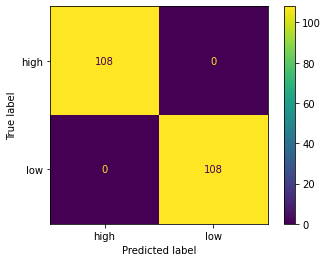

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       108
         low       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [ ]:
#Evaluación de Red Neuronal

from sklearn import metrics
Y_pred = modelNN.predict(X_test)
#Matriz de confusion
metrics.plot_confusion_matrix(estimator=modelNN, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  

plt.show()
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


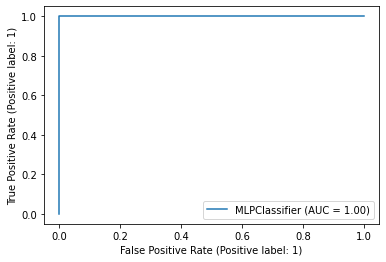

In [ ]:
# Curva ROC -> Knn
metrics.plot_roc_curve(estimator=modelNN, X=X_test, y=Y_test)  #30%
plt.show() 

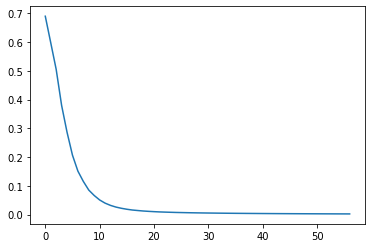

In [ ]:
#Loss es la desviación entre Yreal y el Ypred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

## **4. Guardamos el Modelo**

In [ ]:
import pickle
filename = 'modelo-clas-tree-knn-nn.pkl'
variables= X.columns._values
pickle.dump([modelTree,modelKnn,modelNN,labelencoder,variables,min_max_scaler], open(filename, 'wb')) #write